In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn as sns
from ipywidgets import interact, fixed
import plotly.graph_objs as go
uploaded = files.upload()
dataset = pd.read_csv("data_pulsars (2).csv") #cargar el dataset

##EDA

In [ ]:
dataset.describe()

Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean                                     0.477857   
std                                      1.064040   
min                                     -1.876011   
25%                                      0.027098   
50%                                      0.223240   
75%                                      0.473325   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         17898.000000               17898.000000   
mean                              1.770279                  12.614400   
std                               6.167913                  29.472897   
min                              -1.791886                   0.213211   
25%                              -0.188572                   1.923077   
50%                               0.198710                   2.801839   
75%                               0.927783                   5.464256   
max                              68.101622                 223.392141   

        Standard deviation of the DM-SNR curve  \
count                             17898.000000   
mean                                 26.326515   
std                                  19.470572   
min                                   7.370432   
25%                                  14.437332   
50%                                  18.461316   
75%                                  28.428104   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309330   
max                               34.539844                    1191.000837   

       target_class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
dataset["target_class"].value_counts().to_frame()#Obtener el numero de datos por cada clase

count
target_class       
0             16259
1              1639

Se encuentra que el dataset no esta balanceado

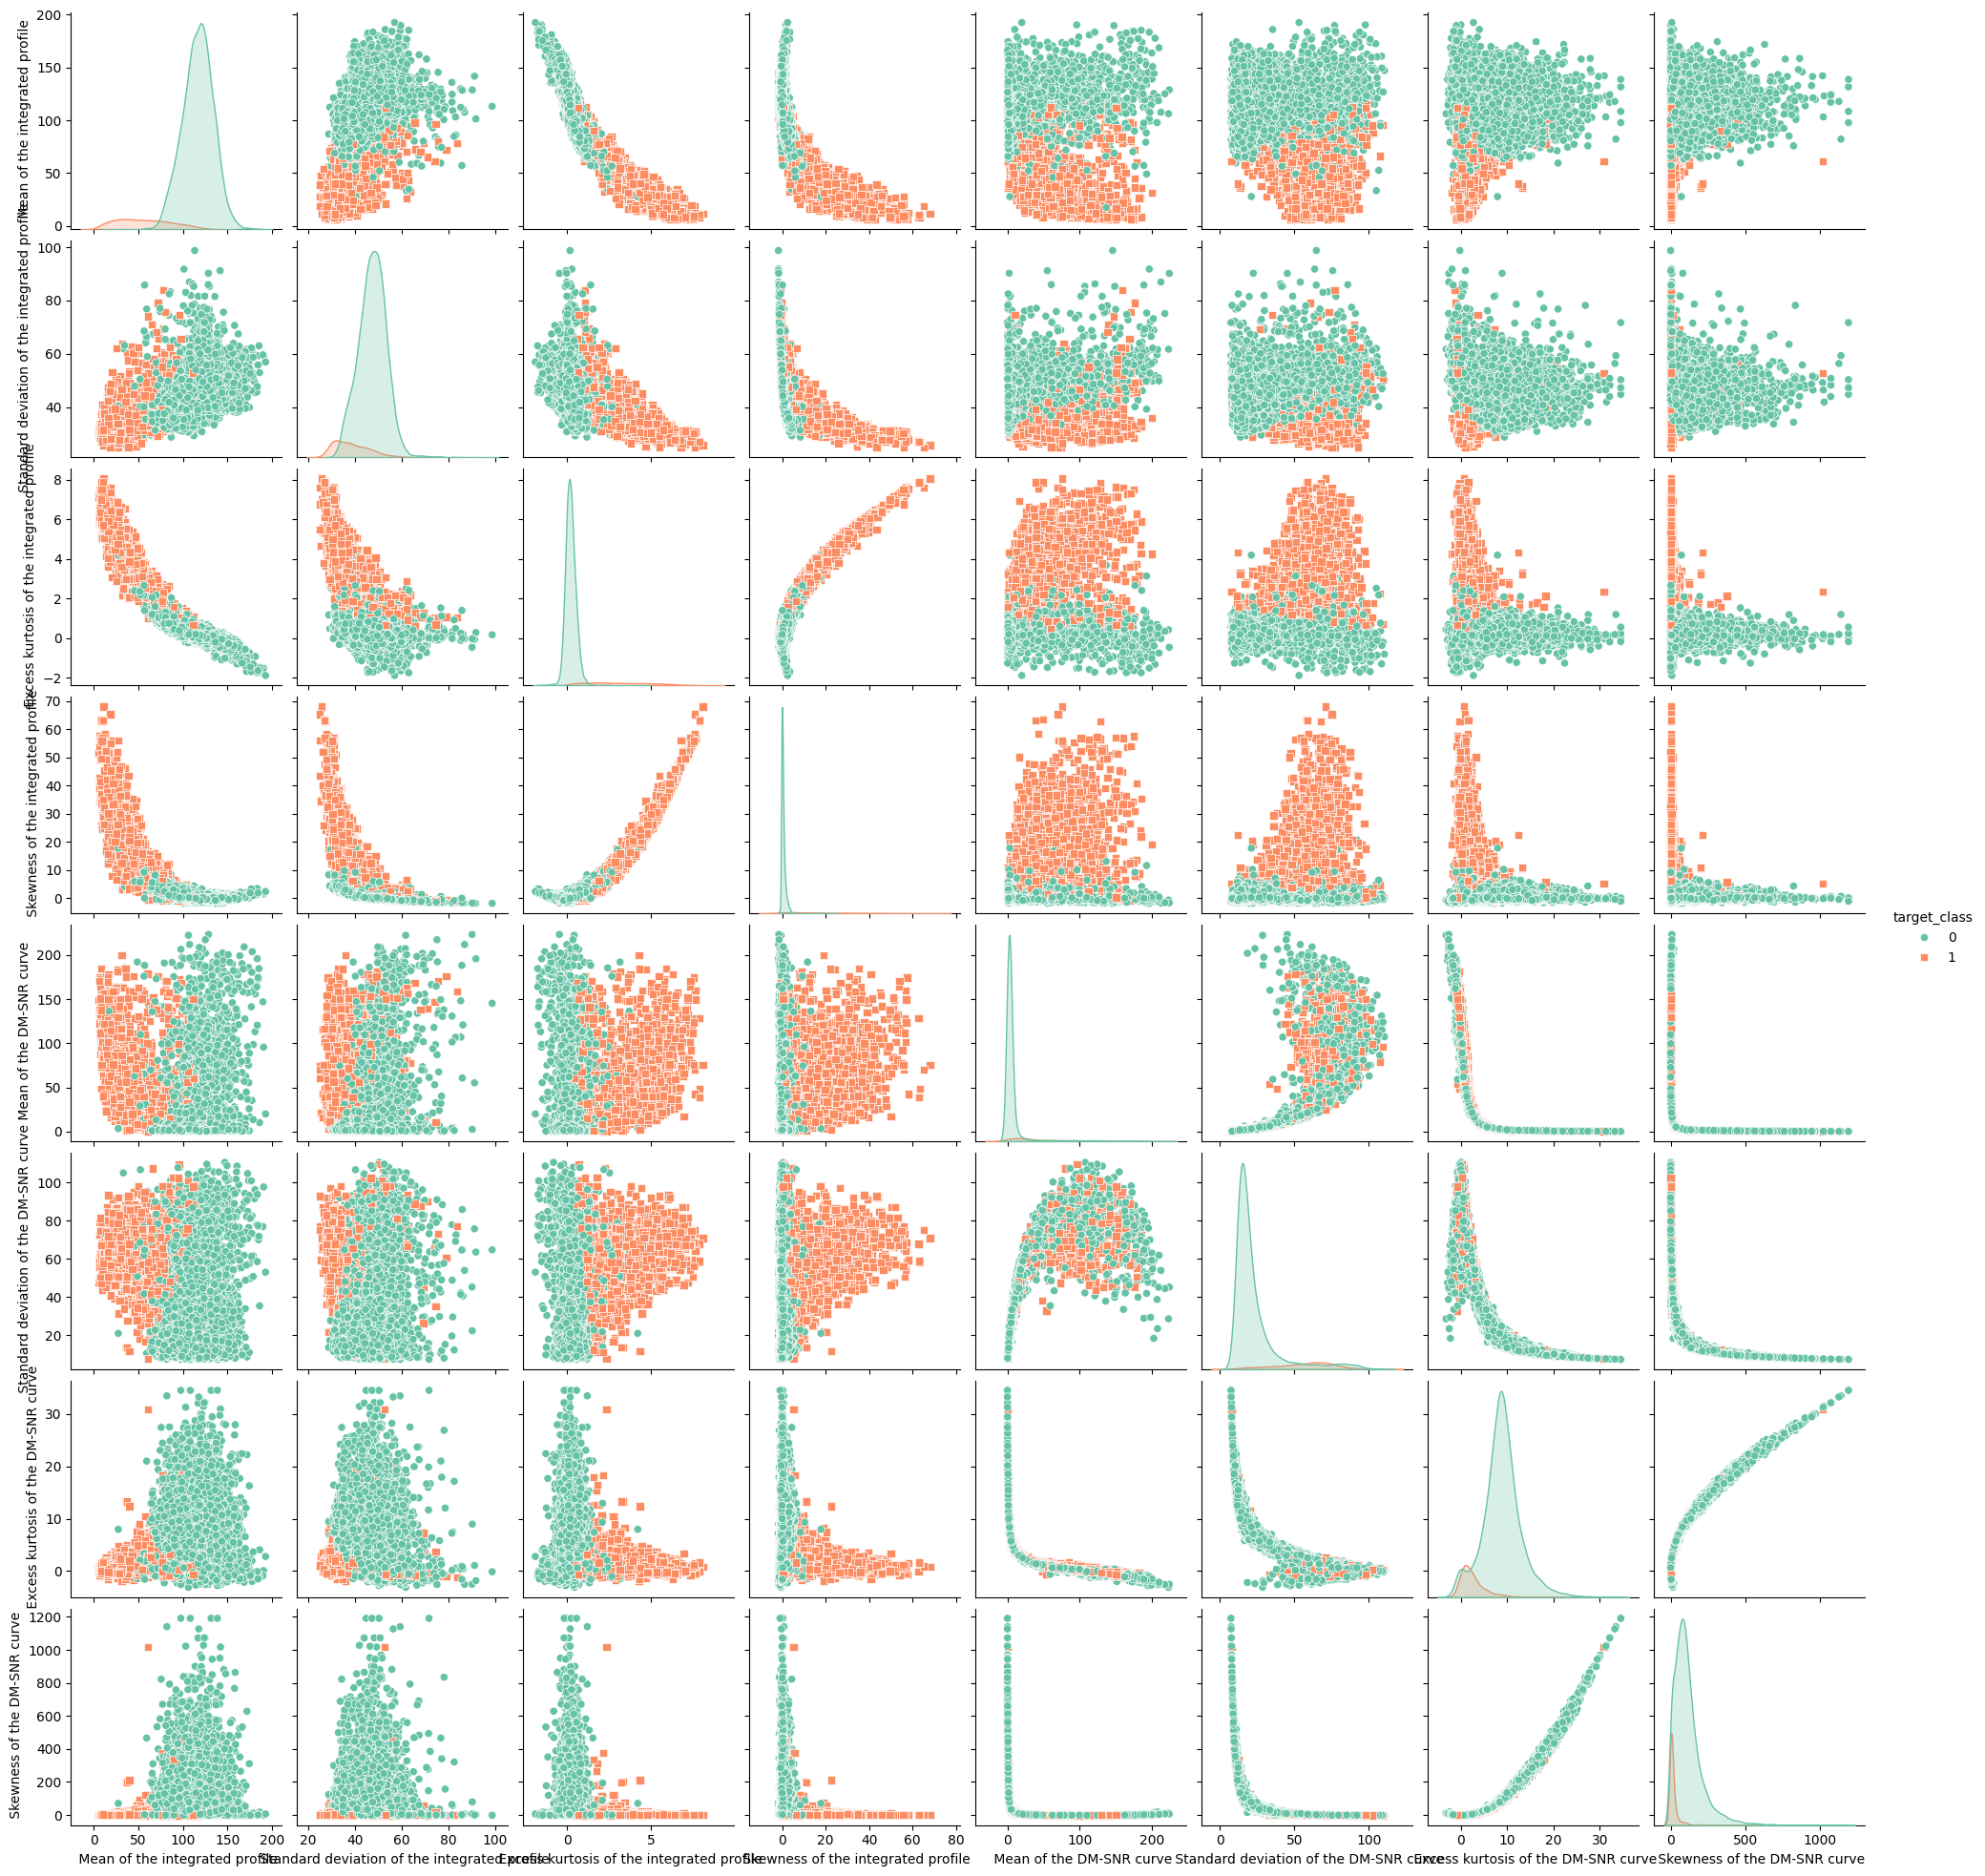

In [ ]:
#pair plots
sns.pairplot(dataset, hue="target_class", markers=["o", "s"], palette="Set2")

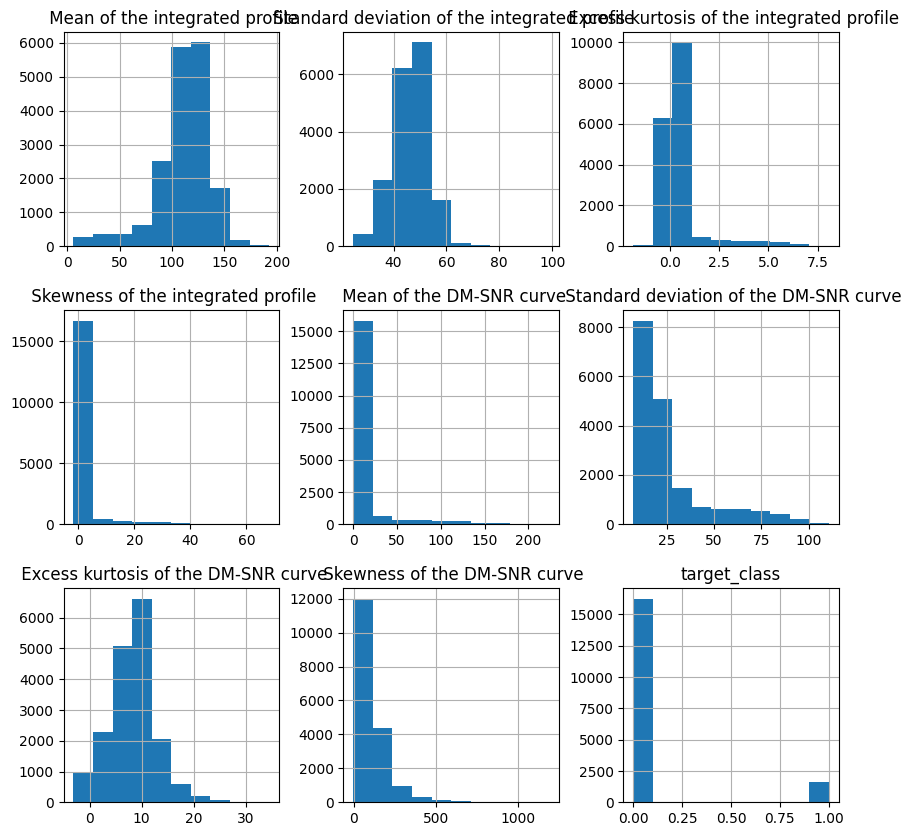

In [ ]:
#Histogramas de caracteristicas
dataset.hist(figsize = (10,10),bins=10)#histograma
plt.show()

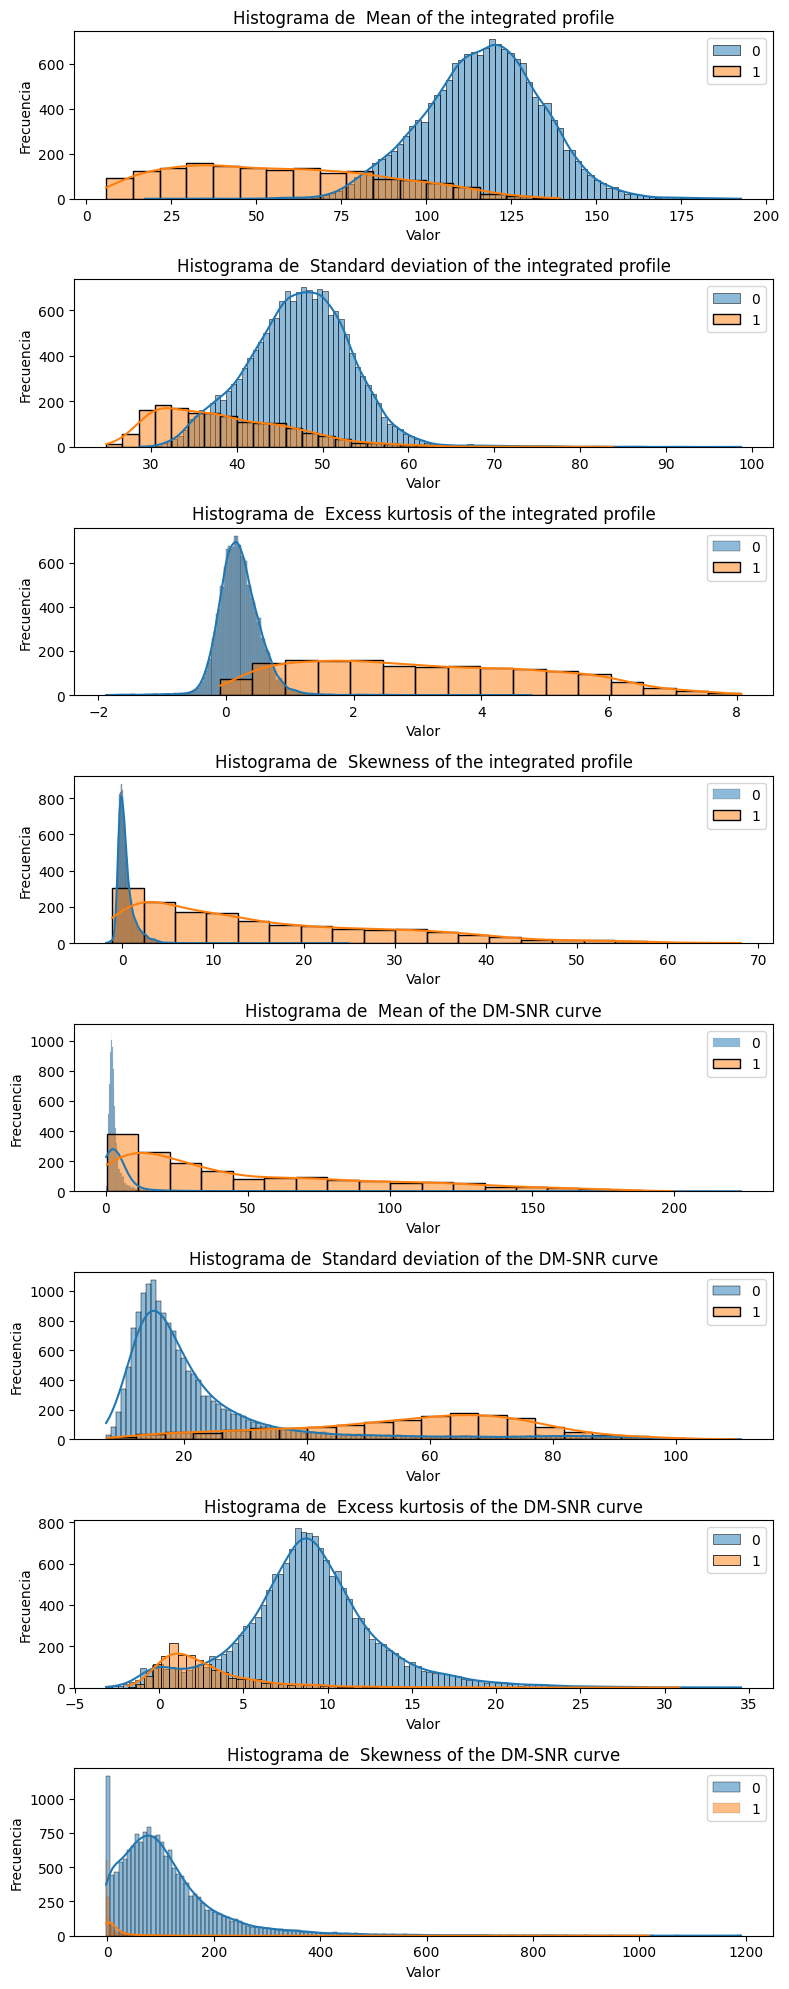

In [ ]:
#Histogramas por clases
# Crear las figuras y los subplots
fig, axes = plt.subplots(8, 1, figsize=(8, 20))

# Lista de características y clases
features = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile',' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve']
classes = dataset['target_class'].unique()

# Iterar sobre las características y crear histogramas para cada clase
for i, feature in enumerate(features):
    for cls in classes:
        sns.histplot(dataset[dataset['target_class'] == cls][feature], ax=axes[i], label=cls, kde=True)
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar las figuras
plt.show()

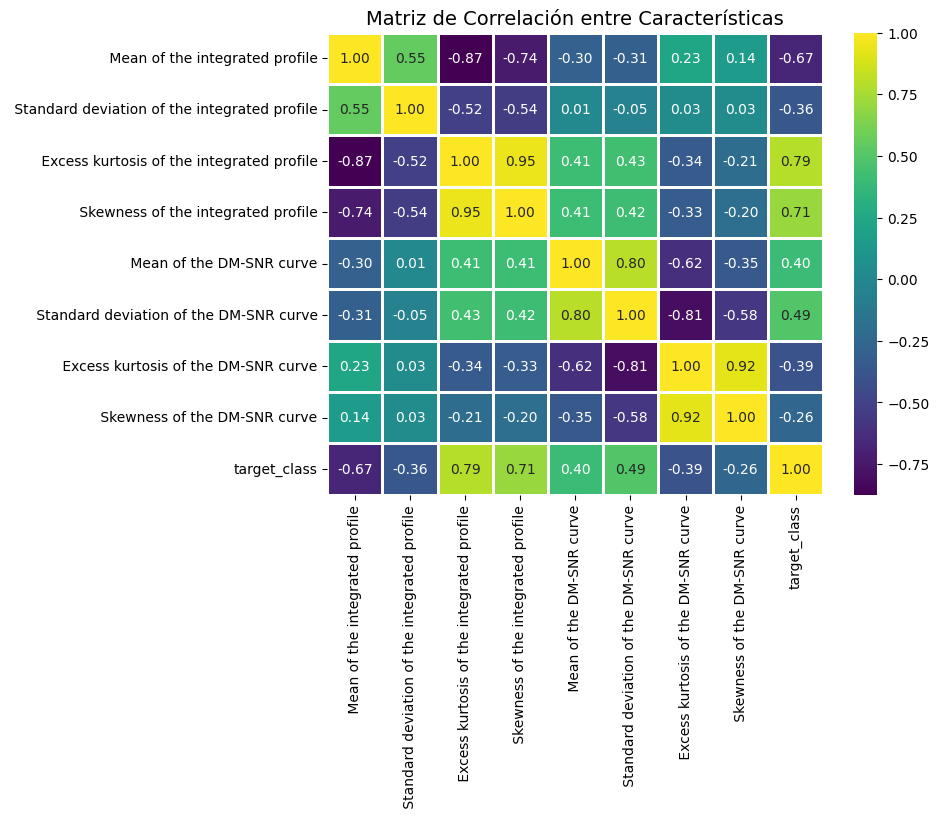

In [ ]:
#Matriz de correlacion de caracteristicas
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_cols = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile',' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve','target_class']
numeric_data = dataset[numeric_cols]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear una figura y un eje (subplot) utilizando seaborn
plt.figure(figsize=(8, 6))

# Cambiar el colormap a 'viridis' (otro colormap fresco)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Añadir título
plt.title('Matriz de Correlación entre Características', fontsize=14)

# Mostrar la matriz de correlación
plt.show()

Con el EDA realizado se decide tomar como caracteristicas para el entrenamiento el exceso de curtosis y la asimetria

In [ ]:
#Generar matriz de caracteristicas y vector de targets
df=pd.DataFrame(data= np.c_[dataset[' Excess kurtosis of the integrated profile'],dataset[' Skewness of the integrated profile'], dataset['target_class']])
X = df[[0, 1]].values
y = df[2].values

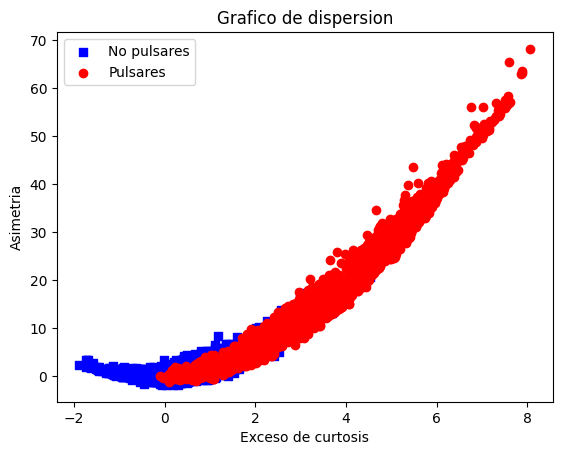

In [ ]:
#Grafico de dispersion
# Función para graficar el scatter plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='No pulsares',marker = "s")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Pulsares')
plt.xlabel('Exceso de curtosis')
plt.ylabel('Asimetria')
plt.title('Grafico de dispersion')
plt.legend()

In [ ]:
#Perceptron
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

In [ ]:
#Entrenamiento de perceptron
ppn =Perceptron(eta=0.3, n_iter=100, Af='step_function', Rw=0)
ppn.fit(X,y)


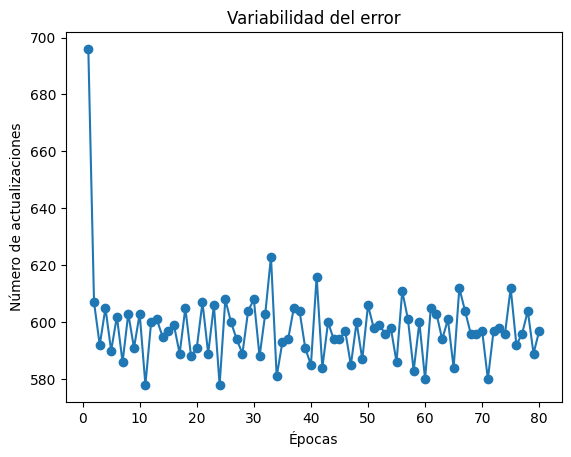

In [ ]:
#Grafico de variabilidad del error
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Variabilidad del error')
plt.show()

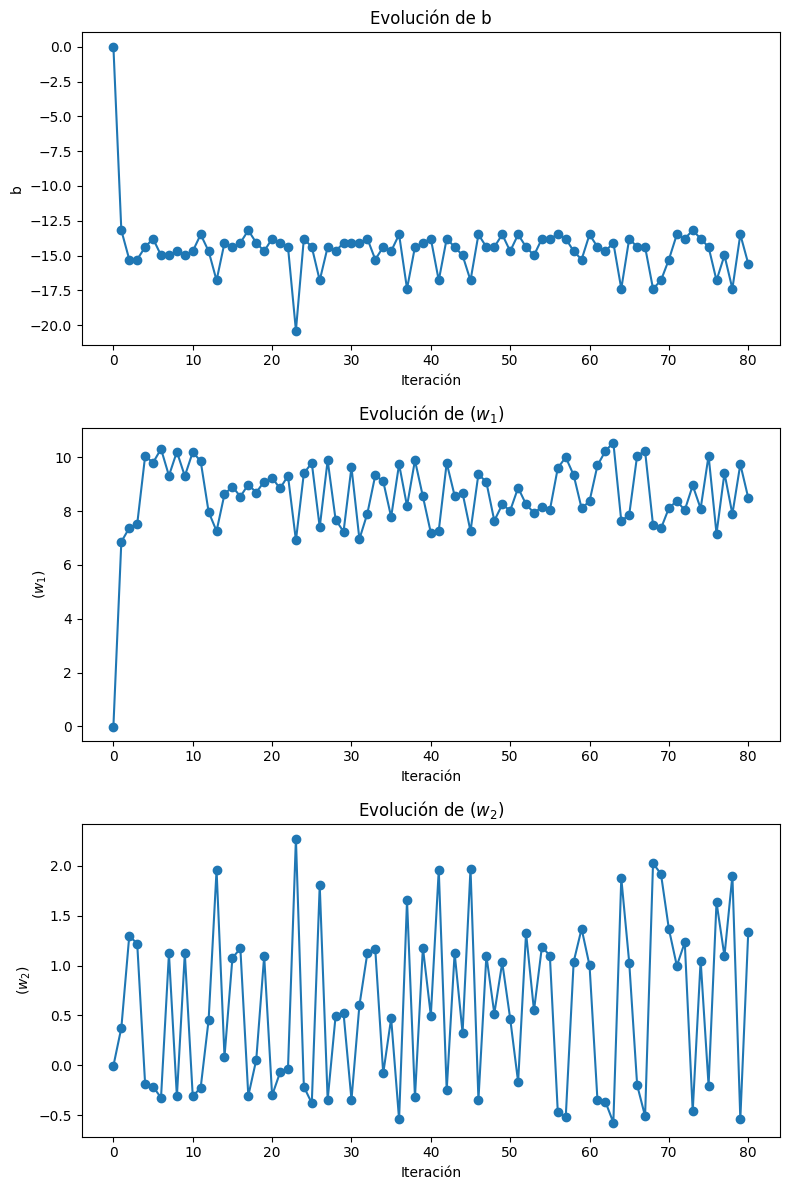

In [ ]:
#Variabilidad de hiperparametros
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

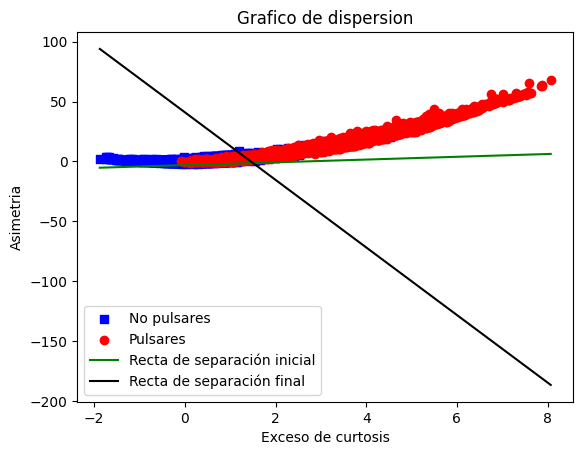

In [15]:
#Grafica de recta de separación

#Pesos iniciales del entrenamiento para graficar recta
b=ppn.w_historical[0][0]
w1=ppn.w_historical[0][1]
w2=ppn.w_historical[0][2]

x_plane = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)

recta = (b + w1 * x_plane )/w2

# Función para graficar el scatter plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='No pulsares',marker = "s")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Pulsares')
plt.xlabel('Exceso de curtosis')
plt.ylabel('Asimetria')
plt.title('Grafico de dispersion')
plt.plot(x_plane, recta, color='green', label='Recta de separación inicial')

#Pesos finales del entrenamiento para graficar recta
b=ppn.w_historical[-1][0]
w1=ppn.w_historical[-1][1]
w2=ppn.w_historical[-1][2]
recta = (b + w1 * x_plane )/w2
plt.plot(x_plane, recta, color='k', label='Recta de separación final')
plt.legend()

Realizar el proceso con 3 caracteristicas, la caracteristica que se agregara sera el promedio del perfil integrado

In [28]:
#Generar matriz de caracteristicas y vector de targets
df=pd.DataFrame(data= np.c_[dataset[' Excess kurtosis of the integrated profile'],dataset[' Skewness of the integrated profile'],dataset[' Mean of the integrated profile'], dataset['target_class']])
X = df[[0, 1,2]].values
y = df[3].values

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
      name=f'Clase {int(label)}'
    ))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis_title='Exceso de curtosis',
        yaxis_title='Asimetria',
        zaxis_title='Promedio del perfil integrado'
    ),
    title='Grafico de dispersion 3D Pulsares'
)

# Mostrar la figura interactiva
fig.show()


In [24]:
#Entrenamiento del perceptron con 3 caracteristicas
ppn =Perceptron(eta=0.35, n_iter=200, Af='step_function', Rw=0)
ppn.fit(X,y)

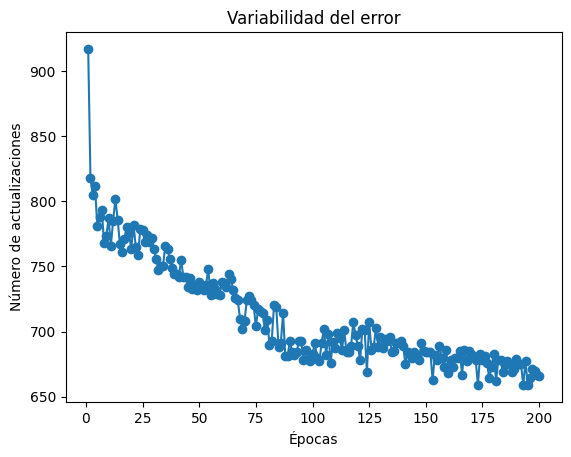

In [25]:
#Grafico de variabilidad del error
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Variabilidad del error')
plt.show()

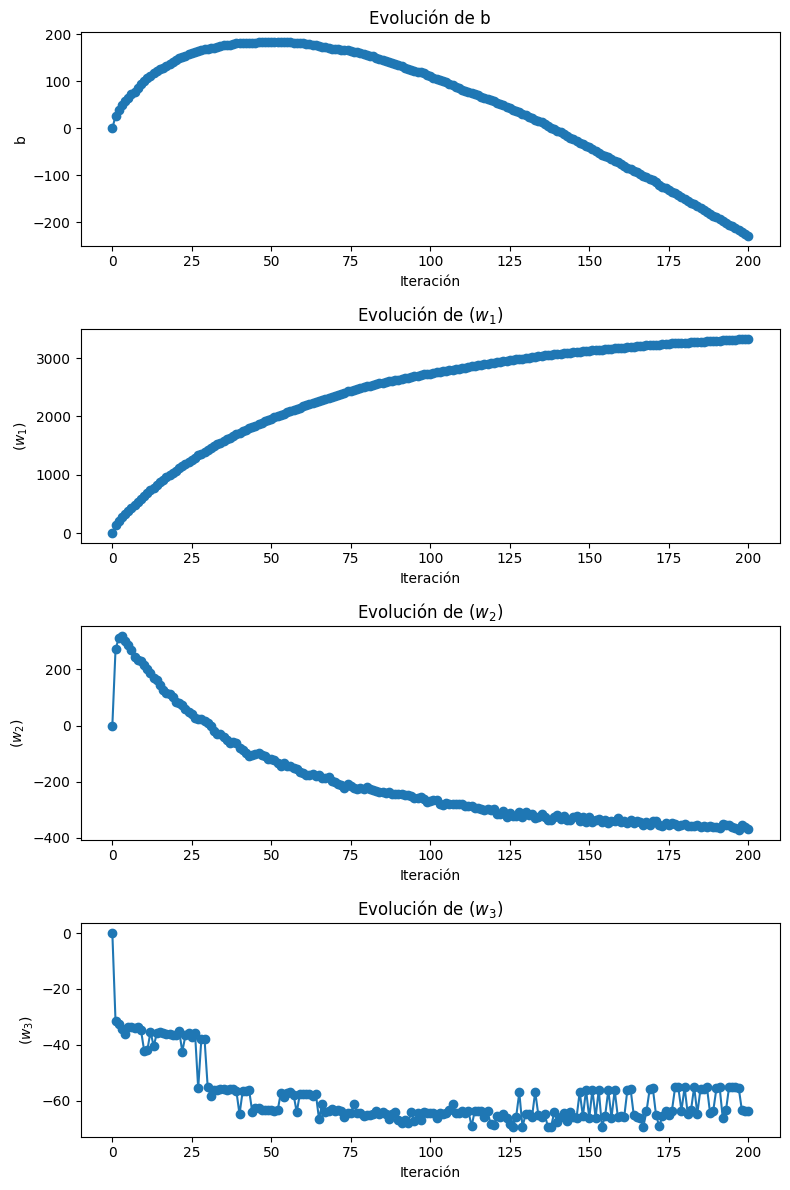

In [26]:
#Evolucion del bias y los parametros
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)', '($w_3$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [34]:
#Grafico de plano de separacion
#Datos de entrenamiento inciales
b=ppn.w_historical[0][0]
w1=ppn.w_historical[0][1]
w2=ppn.w_historical[0][2]
w3=ppn.w_historical[0][3]


# Crear puntos para el plano
x_plane = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_plane = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)

z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)}'
    ))

# Añadir el plano
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Electric',
    showscale=False,
    name='Plano de separacion sin entrenar',
    showlegend=True
))

#Datos de entrenamiento finales
b=ppn.w_historical[-1][0]
w1=ppn.w_historical[-1][1]
w2=ppn.w_historical[-1][2]
w3=ppn.w_historical[-1][3]
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='YlGnBu',
    showscale=False,
    name='Plano de separacion final',
    showlegend=True
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis_title='Exceso de curtosis',
        yaxis_title='Asimetria',
        zaxis_title='Promedio del perfil integrado'
    ),
    title='Grafico de dispersion 3D Pulsares con plano de separacion aleatorio'
)

# Mostrar la figura interactiva
fig.show()

Como conclusion encontramos que ni con las 2 caracteristicas seleccionadas inicialmente ni con la que se adiciono posteriormente se logra una separacion completa de las clases, sin embargo luego del entrenamiento con el perceptron se obtiene una separacion que minimiza los errores